# Cover Me! —  Analyzing Indicators That Determine Health Premium Costs 
In this project, I will be analyzing health insurance premium costs for policy holders. The goal of the study is to determine the indicators that determine the price of a policy holder's premium. The analysis performed will be used to draw some conclusions on where to increase health services and the type of policy holders that have incresed premium costs. The exact collection methodology and source is not known to me, the data is openly availible online at multiple sites. More information on the data can be found on [kaggle](https://www.kaggle.com/simranjain17/insurance) where I sourced the dataset from. The data set will be analyzed to determine the differences that certain indicators play in premium costs. The following indicators will be isolated to draw inferences on how premium costs change: 
- By Sex 
- By Age
- By BMI
- By # of Children
- By if there are smokers or not
- By region 

Summary of Analysis
After completing an analysis of the data set, the conclusion that was drawn was that policy holders that were primarily women in southeast regions had the highest premium charges. Further compounded by other factors such as if they are smokers and specifically have 2-3 children. I also concluded that the best areas to increase health services were most likely metropolitian areas with individuals in their early 20s but also contain an elderly crowd. 

For more details, please refer to the full analysis below.

# Exploring Health Insurance Premiums
I want to do a quick exploration of the dataset that contains the coverage data to get a quick overview on how it is structured.

I'll import the data into pandas and gather some information on the beginning and end of the data set as well as the columns. 

In [1]:
# import pandas library
import pandas as pd
insurance = pd.read_csv('insurance.csv')

I want to get a bit more information about the data set so I'll print the first and last rows and use .info( ) to explore. 

In [2]:
# print first five rows
insurance.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
# print last five rows
insurance.tail(5)

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [4]:
# show information about rows and columns
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


The data set contains 1337 rows and 7 columns, there are no null values in any columns so no initial cleaning will have to be done. Each row is a policy holder with the columns providing descriptions about the individual such as age, bmi, and premium costs. The columns and their descriptions are as followed:
- 1.age -  age of the policy holder
- 2.sex - gender of the policy holder
- 3.bmi - body mass index 
- 4.children - # of children 
- 5.smoker - whether or not the policy holder is a smoker
- 6.region - region where the policy holder lives
- 7.charges - how much the policy holder is charged for their premium. 

Based off the values given in the 'charges' column, it is reasonable to assume that those values are the annual premium charges that each policy holder is paying, and not a typical monthly payment. 

# Analyzing Premium Charges
The first thing that I'll inspect is the premium charges that each policy holder is paying. I'll plot the frequency of charges to see what the distribution of values in that column is looking like. 

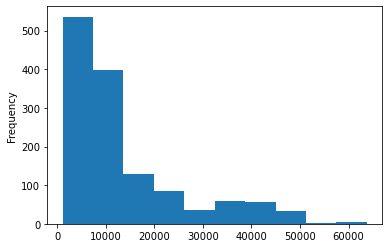

count     1338.000000
mean     13270.422265
std      12110.011237
min       1121.873900
25%       4740.287150
50%       9382.033000
75%      16639.912515
max      63770.428010
Name: charges, dtype: float64

In [5]:
# import matplotlib library
import matplotlib.pyplot as plt
%matplotlib inline 

# plot histogram for 'charges' column
charges = insurance['charges']
charges.plot.hist()
plt.show()
charges.describe()

Based off the histogram above and the results of charges.describe( ), I can see that premium costs for the policy holders range from 1121.87 to 63770.43 annually. 

The other observations are as followed:
- About 25% of the policy holders pay 4740.29 in premiums
- About 50% of the policy holders pay 9382.03 in premiums
- About 75% of the policy holders pay 16639.91 in premiums

The mean of the charges is 13270.42 annually for a policy holder. Looking at all that information, it suggests that anything above the 75% mark in charges seems to be outlier of some sort. This is supported by the shape of the histogram as it is right-skewed, meaning that a majority of the values fall on the right side of the plot or the lower end. Thus, it can be inferred that most of the policy holders are not paying incredibly high premiums annually due to not needing as much coverage or other factors such as health and region. Though, it could also be that many of the policy holder chose a plan that had a lower premium but higher deductible. 

# Charges by Sex
Now that I have a general idea of the distribution in insurance premium costs, I want to see how different types of indicators play a part in how the price in premiums change.

First, I'll take a look at sex, and how premium charges differ between males and females. 

In [6]:
# Seperate the sex column by male and female into two dataframes
male = insurance[insurance['sex'] == 'male'].copy()
female = insurance[insurance['sex'] == 'female'].copy()

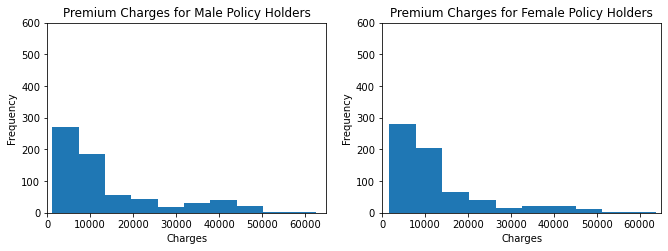

In [7]:
plt.figure(figsize =(11, 3.5))

plt.subplot(1,2,1)
plt.hist(male['charges'])
plt.title('Premium Charges for Male Policy Holders')
plt.xlabel('Charges')
plt.ylabel('Frequency')
plt.xlim([0, 65000])
plt.ylim([0, 600])

plt.subplot(1,2,2)
plt.hist(female['charges'])
plt.title('Premium Charges for Female Policy Holders')
plt.xlabel('Charges')
plt.ylabel('Frequency')
plt.xlim([0, 65000])
plt.ylim([0, 600])

plt.show()

In [8]:
female['charges'].describe()

count      662.000000
mean     12569.578844
std      11128.703801
min       1607.510100
25%       4885.158700
50%       9412.962500
75%      14454.691825
max      63770.428010
Name: charges, dtype: float64

In [9]:
male['charges'].describe()

count      676.000000
mean     13956.751178
std      12971.025915
min       1121.873900
25%       4619.134000
50%       9369.615750
75%      18989.590250
max      62592.873090
Name: charges, dtype: float64

Based off the information above, There are a few interesting things to note. The first is how similar the plots are to one another. This suggests that gender doesn't play any real role in the price that policy holders are paying for their premium. Second, diving a bit deeper by using the built-in function .describe( ) shows that while very close, males do pay on average, about 1500 more than female policy holders do. Third, although on average, males are paying a higher premium annually, it is important to note that as individual policy holders, females are paying a higher premium annually. With the difference in minimum value between male and female policy holders having almost a 500 dollar difference. 

What this suggests to me is that while on average, males are paying more than females, looking at charges on a case to case basis, females are being charged more for coverage. This could be the result of the thinking that females are more likely to have health issues and see a doctor thus would go for a plan that has a higher premium but lower deductible to account for frequency of visits. This is supported in this [Healthline article](https://www.healthline.com/health-news/should-women-pay-more-healthcare-services) stating that before an update in the Affordable Care Act, women were as a higher risk for health insurance, due to their likelihood to see a doctor mroe frequently, live longer, and have babies. 

# Age Indicators
Next, I'll take a look at the role, age plays in how the value in the 'charges' column fluctuates. I want to know if there is change in price as policy holders age that they are paying for in their premiums but more specfically how female and male policy holders are being charged as they age. 

In [10]:
male.corr()['charges']

age         0.282369
bmi         0.225847
children    0.074496
charges     1.000000
Name: charges, dtype: float64

In [11]:
female.corr()['charges']

age         0.324575
bmi         0.161419
children    0.058492
charges     1.000000
Name: charges, dtype: float64

In [12]:
# Group male and female policy holders by age
by_age_male = male.groupby('age').mean()
by_age_female = female.groupby('age').mean()

print(by_age_male['charges'])
print(by_age_female['charges'])

age
18     7603.180557
19     9876.241479
20    12780.292557
21     4193.191381
22    12073.083743
23     6249.169528
24    14726.212134
25    11436.821289
26     6238.092207
27    10407.656561
28    11622.567716
29    13298.580781
30    15604.684805
31    11546.072300
32     9514.321854
33    12264.365625
34    12290.449530
35    11265.833152
36    17274.985462
37    15956.808402
38     9919.546487
39    14356.309565
40     9704.719357
41    11537.872675
42    13884.293811
43    19999.669198
44    14456.856598
45    16782.582037
46    14255.103088
47    19344.029414
48    15850.409109
49    13307.131439
50    18163.591449
51    14280.192968
52    20685.642063
53    14640.653348
54    20989.347485
55    16245.625341
56    18296.115673
57    16184.369276
58    14629.645304
59    17726.974646
60    26262.168367
61    22039.190030
62    21843.286953
63    17200.753432
64    23057.882975
Name: charges, dtype: float64
age
18     6522.257919
19     9611.799484
20     7351.917571
21     5350.

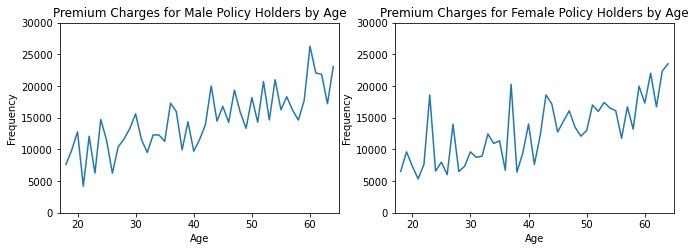

In [13]:
plt.figure(figsize =(11, 3.5))

plt.subplot(1,2,1)
by_age_male['charges'].plot.line()
plt.title('Premium Charges for Male Policy Holders by Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.xlim([17, 65])
plt.ylim([0, 30000])

plt.subplot(1,2,2)
by_age_female['charges'].plot.line()
plt.title('Premium Charges for Female Policy Holders by Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.xlim([17, 65])
plt.ylim([0, 30000])

plt.show()

The line plot for male policy holders by age shows a more linear pattern than the line plot for female policy holders by age does. The plot for female policy holders by age seems to slightly more sproadic in nature.Although, male policy holders on average, are paying roughly the same as their female counterparts with a few noticeable expceptions: 
- At age 21, Male policy holders are paying roughly 1000 less than their female counterparts.
- At age 23, the disparity is very noticeable as male policy holders are being charged roughly 6249.17 while female policy holders are paying 18590.47
- At age 37, Male policy holders are charged 15956.81 on average, while female policy holders are charged 20254.94
- Age age 60, Male policy holders are charged 26262.17 on average, while female policy holders are charged 17307.33

What this tells me is that as the policy holders age, the premium charge that either a male and female policy holder pays per year increases quite similarly. The first conclusion that can be drawn is that typically as a policy holder ages, regardless of gender, the cost of the premium will go up. Then, there are the exceptions, the first being at age 21 where female policy holders are paying 5350.39 in comparison to male policy holders at 4193.19 which is a difference of over 1000 dollars. There are a variety of different reasons that one could conclude that with the most prominant to me being that this is the age where health insurance providers see female policy holders as beginning to become a risk so a higher premium is charged. The disparity really begins to show at age 23, with female policy holders being charged 3x as much as their male counterparts, on average. This could be the result of a combination of inflation each year and a growing number of young adults seeking health care due to medical conditions. Younger generations are more inclined to go see a doctor if they feel they have an issue that needs to be addressed. At age 37, women, on average are paying a little under 5000 more than males in premium charges. Finally, at age 60 is when male policy holders are paying more than their female counterparts, about 9000 more. This is more likely due to the fact that men are not expected to live as long as women do, so at that age, the possibility of having more delibriating health conditions might be more common. 

# BMI Indicators
After looking at how age plays a part in calculating premium charges, another category of interest would be BMI. weight plays a big part in determining the health of an individual so it would be rather interesting to see how much one's premiums would fluctuate depending on what their BMI was. 

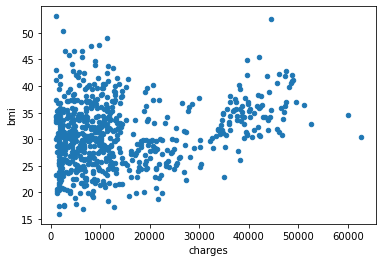

In [14]:
male.plot.scatter('charges', 'bmi')
plt.show()

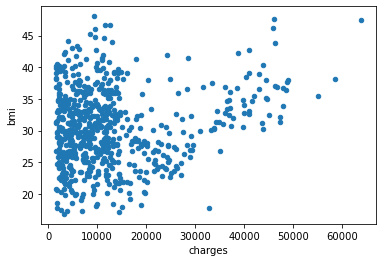

In [15]:
female.plot.scatter('charges', 'bmi')
plt.show()

Both plots are similar in nature, There doesn't seem to be a strong correlation in either but both do have a slight positive correlation to them. This fits with the general idea that as BMI increases, the premium charge would as well, due to one's weight being taken into acccount as a health risk. If one's BMI is higher or lower than what the average is than it can be determined that these policy holders hold a higher risk of developing cardio-vascular and other weight-related diseases or issues. That would cause a higher uptick in coverage usuage to account for doctor's visits and medication need to combat said conditions. Although, an issue arises in that there is significant clumping of data points in both plots at the left most end suggesting that bmi has no real correlation with determining the price that a policy holder would pay in premium charges annually. BMI is also not a reliable indicator for determining one's health. As found in this [Harvard article](https://www.health.harvard.edu/blog/how-useful-is-the-body-mass-index-bmi-201603309339) about BMI as a reliable indicator for health and weight. BMi is considered an outdated measurement to determine health, as it does not classify metabolic health great at all. It frequently misclassifies metabolic health(the distribution of fat in one's body) frequently and is particularly unreliable for athletes, pregnant women, and even the elderly. 

# Dependent Premiums
Next, I want to inspect the 'children' column and understand how the # of children impact the premium that a policy holder pays. 

In [16]:
# Group male and female policy holders by number of children
by_children_male = male.groupby('children').mean()
by_children_female = female.groupby('children').mean()

print(by_children_male['charges'])
print(by_children_female['charges'])

children
0    12832.696736
1    13273.522458
2    16187.095325
3    16789.167419
4    13782.284829
5     7931.658310
Name: charges, dtype: float64
children
0    11905.714276
1    12161.360414
2    13941.317326
3    13865.605066
4    13937.674562
5     9854.006419
Name: charges, dtype: float64


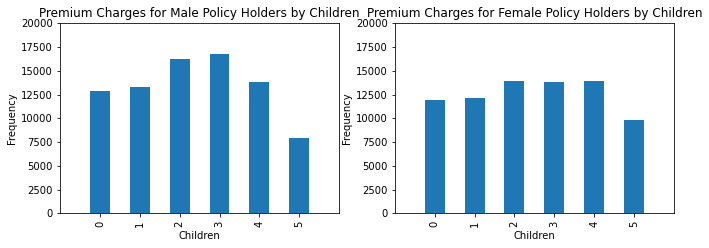

In [17]:
plt.figure(figsize =(11, 3.5))

plt.subplot(1,2,1)
by_children_male['charges'].plot.bar()
plt.title('Premium Charges for Male Policy Holders by Children')
plt.xlabel('Children')
plt.ylabel('Frequency')
plt.xticks(rotation =90)
plt.xlim([-1, 6])
plt.ylim([0, 20000])

plt.subplot(1,2,2)
by_children_female['charges'].plot.bar()
plt.title('Premium Charges for Female Policy Holders by Children')
plt.xlabel('Children')
plt.ylabel('Frequency')
plt.xticks(rotation =90)
plt.xlim([-1, 6])
plt.ylim([0, 20000])

plt.show()

Based on the bar plot above, in this data set there are policy holders that have either 0 children up to 5 total. The bar plot was seperated by if the children are being claimed on a male policy owners's insurance or a female's. There's no clear impact that the number of children have on insurance premiums. Comparing the two graphs to one another, the graphs don't show much difference to one another. The most noticeable is the significant dip in charges that a policy holder(regardless of gender) pays for when they have 5 children comapred to the other frequencies. Looking a bit further into this on the [Blue Cross Blue Shield of Michigan website](https://www.bcbsm.com/index/health-insurance-help/faqs/topics/buying-insurance/family-size-impact-cost.html), this is most likely due to how family size is determined in health insurance coverage. What is meant by this is that premiums only take into account the three oldest children in families of more than three under the age of 21. This could also explains why policy holders with 2-3 children are paying more in insurance but without further information about chronic health conditions related to each policy holder or specific ages of their children, it is impossible to say exactly. 

# Smoking Patterns
Another category that needs to be explored is the 'smoking' column which provides a yes or no response to whether or not the policy holder smokes. The general consensus would be that smokers will be paying a higher premium due to smoking increasing the risk to one's health. 

In [18]:
# Group male and female policy holders by if they are smokers
by_smoker_male = male.groupby('smoker').mean()
by_smoker_female = female.groupby('smoker').mean()

print(by_smoker_male['charges'])
print(by_smoker_female['charges'])

smoker
no      8087.204731
yes    33042.005975
Name: charges, dtype: float64
smoker
no      8762.297300
yes    30678.996276
Name: charges, dtype: float64


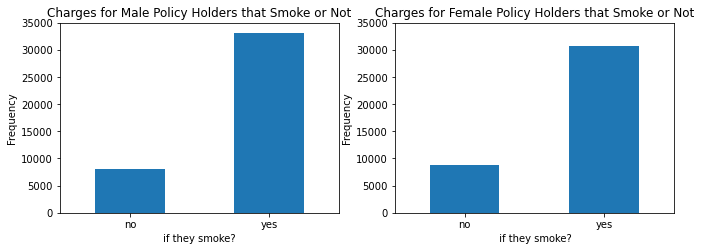

In [19]:
plt.figure(figsize =(11, 3.5))

plt.subplot(1,2,1)
by_smoker_male['charges'].plot.bar()
plt.title('Charges for Male Policy Holders that Smoke or Not')
plt.xlabel('if they smoke?')
plt.ylabel('Frequency')
plt.xticks(rotation = 360)
plt.ylim([0, 35000])

plt.subplot(1,2,2)
by_smoker_female['charges'].plot.bar()
plt.title('Charges for Female Policy Holders that Smoke or Not')
plt.xlabel(' if they smoke?')
plt.ylabel('Frequency')
plt.xticks(rotation = 360)
plt.ylim([0, 35000])

plt.show()

A quick glance at the bar plot shows that regardless of gender, smokers are charged 4x as much as their non-smoking counterparts. This makes a lot of sense and I don't believe it requires much explanation. Smokers are a much higher health risk and there's a significant chance that smokers are going to use their insurance a lot more than a healthy individual will in their lifetime. All in all, the premium has to take into account the increased amount of risk that a smoker encompasses in regards to their health. 

# Indicators By Region
The final column that I want to explore is the 'region' column and it affects premium charges for policy holders. 

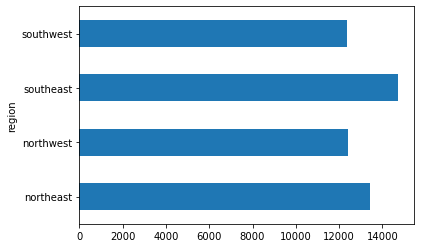

In [20]:
by_region= insurance.groupby('region').mean()

by_region['charges'].plot.barh()
plt.show()

It seems like, on average, not one region exceeds more than 15000 in charges. The region with the highest average premium charge is the southeast region. The [southeast region](https://worldpopulationreview.com/state-rankings/southeast-states) consists of 11 states:
- Alabama
- Florida
- Georgia
- Kentucky
- Maryland
- Mississippi
- North Carolina
- South Carolina
- Tennessee
- Virginia
- West Virginia

An explanation for why the southeast region would have a higher average of premium charges when compared to the other regions could be explained as the region is primarily rural in nature. Rural regions are unfortunately plagued more by  lack of access to care, poor health literacy, and lack of coverage. More information about health care disparities in rural areas can be found [here](https://www.ruralhealthinfo.org/topics/healthcare-access). This is supported in the plot as the southeast region is the only region that has an average charge higher than 14000. Though the southeast region seems like a good area to promote health services to, their strong health disparities pose a high risk in offering coverage. 

# Conclusion
After performing a thorough analysis of the data set, there seems to strong disparity between premium charges between male and female policy holders especially at certain ages. One conclusion that can be drawn is that as one ages, the cost of the premium will typically follow, with female policy holders having a stronger uptick in the premium they would pay to account for expected risks and costs such as more frequent visits, use of medications, and other issues. Further more, there looks to not be a strong correlation between BMI and premium charges as BMI is seen more and more as an unreliable measure of health. Unless it is abudantly clear with further testing in regards to weight, BMI should not a povotable role in determining premium charges. The # of children that a policy holder has an interesting correlation with the price of their premium. Since the price of the premium is dependent on a outside factor that children aged 21 and under in families that have 3 or more children only count the 3 oldest. This factor significantly effects how a policy holder's premium is charged as seen above with families of 5 or more children paying significantly lower than their other counterparts. What this could suggest is that most families of 5 or more in this data set potentially have kids aged 21 and under that helps elevate the price one would pay for their premium annually. Smoking in relation to premium charges is a simple observation and that is that policy holders that smoke will expect to pay almost 4x as much in their premiums annually, on average, than their non-smoker counterparts. This leads to the conclusion that smoking is considered a very high health risk that many insurance companies will take into account. Finally, premium charges in relation to different regions in the US shows that policy holders that lived in the southeast region of the US are charged, on average, the highest amount in their premiums. After doing some outside research, I can conclude that the reason why that is true is due to how health care is percieved in those type of rural areas. Their is strong lack of health literacy, very few access to care, and social stigma that leads to higher premiums as there are not much options to go by. 

Thus, the final conclusion I can draw is that the best regions to be in to get the best outcome for coverage and see policy holders that pay a higher premium are metropolitian areas with a preferably younger age group since, at this time, they are more likely to seek out health services but also have individuals that are older that are more likely to have more chronic health conditions. Rural areas do not look like a good region to promote health services as even though, policy holders in those areas are paying a higher premium, one's access to health care services is very limited there so the premium seems to be high only in regards to the fact there isn't much of an option in those areas. 